<a href="https://colab.research.google.com/github/makhmudov-khondamir/Machine-Learning-Projects/blob/main/15.%20Semantic%20Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Semantic Segmentation**

 Let's build a model of semantic segmentation technology, which is very important for self-driving cars.  That is, our model separates different objects in the picture and shows them in different colors.

 For this, we use the dataset used in the scientific article Semantic object classes in video: A high-definition ground truth database.

In [2]:
from fastai.vision.all import *

path=untar_data(URLs.CAMVID_TINY)

# label getter function
def label_getter(file):
    return path/'labels'/f'{file.stem}_P{file.suffix}'

dls=SegmentationDataLoaders.from_label_func(path,bs=8, fnames=get_image_files(path/'images'), label_func=label_getter, codes=np.loadtxt(path/'codes.txt', dtype=str))

learn=unet_learner(dls, resnet34)
learn.fine_tune(12)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 121MB/s]


epoch,train_loss,valid_loss,time
0,2.694110,2.084624,01:24


epoch,train_loss,valid_loss,time
0,1.569533,1.479856,01:25
1,1.424944,1.409658,01:27
2,1.351246,1.060564,01:24
3,1.238108,1.008579,01:26
4,1.123995,0.844428,01:31
5,1.020183,0.721737,01:29
6,0.928712,0.692469,01:30
7,0.851069,0.681956,01:29
8,0.784383,0.652594,01:26
9,0.725861,0.645857,01:25


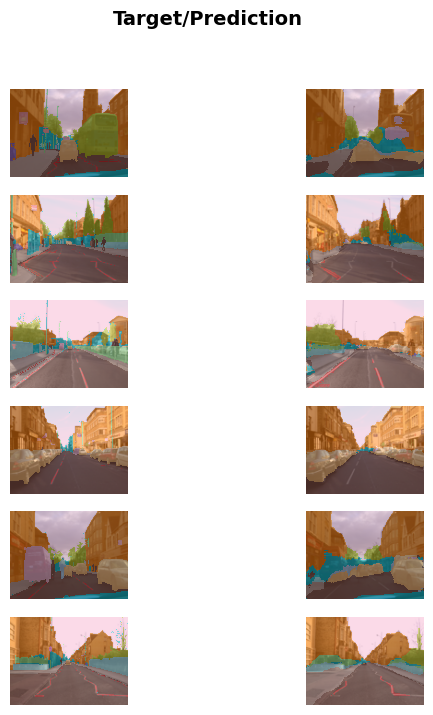

In [3]:
learn.show_results(max_n=6, figsize=(7,8))